In [1]:
import numpy as np
import torch
from matplotlib import pylab as plt

In [3]:
data = np.load("burgers_prepped.npz")
u_in,u_out = data['u_in'],data['u_out']

In [66]:
def do_a_path(samp):
    u0 = u_in[9*samp]
    u0 = u0.reshape((1,1,u_in.shape[1]))
    u0 = torch.tensor(u0,dtype=torch.float32)
    plt.figure()
    plt.plot(u0.numpy().flatten())
    with torch.no_grad():
        for i in range(10):
            uN = model(u0)
            u0[:,:,1:-1] += uN
            plt.plot(u0.numpy().flatten())
    plt.show()

In [55]:
to_u_in = torch.tensor(u_in).reshape((u_in.shape[0],1,u_in.shape[1]))
to_u_out = torch.tensor(u_out-u_in[:,1:-1]).reshape((u_out.shape[0],1,u_out.shape[1]))

In [56]:
u_in.shape

(99, 21)

In [71]:
model = torch.nn.Sequential(
    torch.nn.Conv1d(1,15,3),
    torch.nn.LeakyReLU(),
    torch.nn.Conv1d(15,9,1),
    torch.nn.LeakyReLU(),
    torch.nn.Conv1d(9,3,1),
    torch.nn.LeakyReLU(),
    torch.nn.Conv1d(3,1,1)
)
loss = torch.nn.MSELoss(reduction='sum')

In [72]:
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [73]:
for t in range(10**4):
    random_batch = [0]*10
    for i in range(0,10):
        random_batch[i] = np.random.choice(u_in.shape[0]-1)
    random_batch = torch.LongTensor(random_batch)
    batch_x = to_u_in.index_select(0,random_batch)
    batch_y = to_u_out.index_select(0,random_batch)
    y_pred = model(batch_x)
    lo = loss(y_pred, batch_y)
    if t % 100 == 99:
        print(t, lo.item())
    optimizer.zero_grad()
    lo.backward()
    optimizer.step()

99 40.71751403808594
199 33.91901397705078
299 30.098379135131836
399 27.84906578063965
499 22.11263084411621
599 16.420103073120117
699 11.956178665161133
799 13.140535354614258
899 16.753162384033203
999 14.270824432373047
1099 10.590727806091309
1199 13.416412353515625
1299 7.166098594665527
1399 6.891964435577393
1499 10.729665756225586
1599 10.531317710876465
1699 8.239871978759766
1799 6.979395389556885
1899 11.170249938964844
1999 8.676362037658691
2099 9.002307891845703
2199 6.60133695602417
2299 9.029253959655762
2399 4.37962532043457
2499 13.523367881774902
2599 5.402408599853516
2699 5.6363911628723145
2799 4.601223468780518
2899 3.0634543895721436
2999 94.61510467529297
3099 3.513258695602417
3199 9.277240753173828
3299 4.282994747161865
3399 6.035860538482666
3499 93.74790954589844
3599 93.2530517578125
3699 3.72587513923645
3799 6.8180766105651855
3899 3.9610769748687744
3999 5.4995222091674805
4099 4.326508522033691
4199 6.372250556945801
4299 13.020353317260742
4399 0.5

In [74]:
u0 = u_in[9]
u0 = u0.reshape((1,1,u_in.shape[1]))
u0 = torch.tensor(u0,dtype=torch.float32)
model(u0)

tensor([[[ 0.0888,  0.0750,  0.0551,  0.0299,  0.0038, -0.0105, -0.0059,
           0.0027,  0.0069,  0.0110,  0.0151,  0.0092, -0.0105,  0.0019,
           0.0217,  0.0206,  0.0058, -0.0089, -0.0237]]],
       grad_fn=<SqueezeBackward1>)

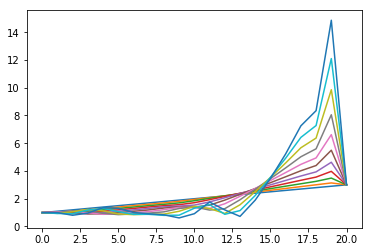

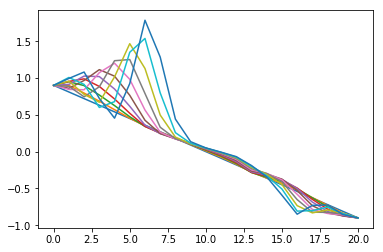

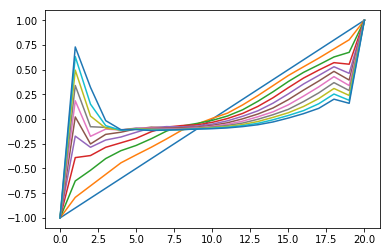

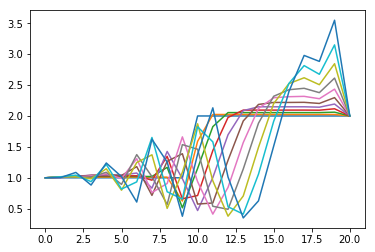

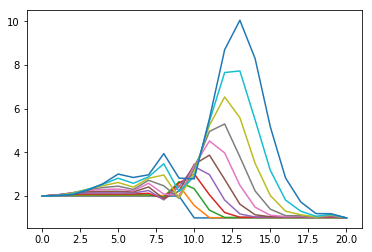

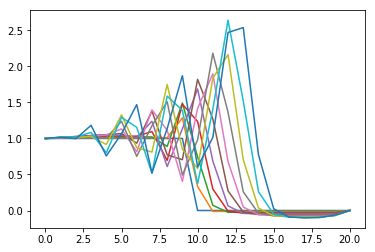

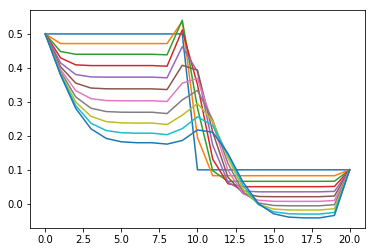

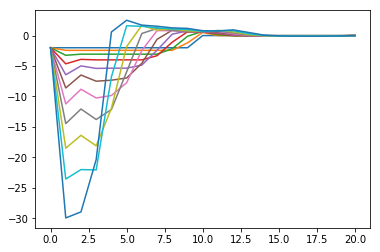

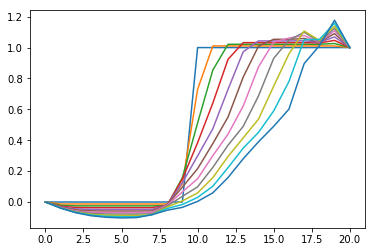

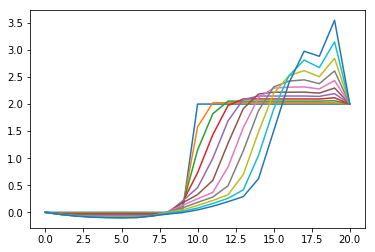

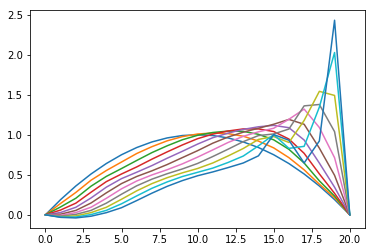

In [76]:
for i in range(11):
    do_a_path(i)